In [5]:
import random

# Generate a random configuration for queens on the board
def generate_random_board(size):
    return [random.randint(0, size - 1) for _ in range(size)]

# Evaluate how good (fit) a solution is
def calculate_fitness(configuration, max_score):
    # Count horizontal conflicts
    horizontal_conflicts = sum([configuration.count(queen) - 1 for queen in configuration]) / 2

    # Count diagonal conflicts
    diagonal_conflicts = 0
    n = len(configuration)
    left_diag = [0] * (2 * n - 1)
    right_diag = [0] * (2 * n - 1)

    for i in range(n):
        left_diag[i + configuration[i]] += 1
        right_diag[n - 1 + i - configuration[i]] += 1

    for count in left_diag + right_diag:
        if count > 1:
            diagonal_conflicts += count - 1

    # Calculate fitness score
    return int(max_score - (horizontal_conflicts + diagonal_conflicts))

# Perform crossover between two parents to create a new child
def perform_crossover(parent1, parent2):
    n = len(parent1)
    offspring = [parent1[i] if random.random() < 0.5 else parent2[i] for i in range(n)]
    return offspring

# Introduce random mutations in a solution
def apply_mutation(configuration):
    n = len(configuration)
    index = random.randint(0, n - 1)
    configuration[index] = random.randint(0, n - 1)
    return configuration

# Select a solution based on probability
def select_solution(population, probabilities):
    total_prob = sum(probabilities)
    threshold = random.uniform(0, total_prob)
    running_sum = 0
    for solution, prob in zip(population, probabilities):
        running_sum += prob
        if running_sum > threshold:
            return solution
    return population[0]

# Genetic algorithm implementation
def n_queens_genetic_algorithm(population, max_fitness):
    mutation_chance = 0.1
    next_generation = []
    fitness_scores = [calculate_fitness(individual, max_fitness) for individual in population]

    # Preserve the best solution
    best_solution = population[fitness_scores.index(max(fitness_scores))]
    worst_solution = population[fitness_scores.index(min(fitness_scores))]
    next_generation.append(best_solution)
    next_generation.append(worst_solution)

    probabilities = [score / max_fitness for score in fitness_scores]

    for _ in range(len(population) - 2):
        parent1 = select_solution(population, probabilities)
        parent2 = select_solution(population, probabilities)
        child = perform_crossover(parent1, parent2)
        if random.random() < mutation_chance:
            child = apply_mutation(child)
        next_generation.append(child)

    return next_generation

# Display the board representation of a solution
def display_board(configuration):
    size = len(configuration)
    board = [["." for _ in range(size)] for _ in range(size)]
    for col, row in enumerate(configuration):
        board[row][col] = "Q"
    for row in board:
        print(" ".join(row))

# Main program execution
if __name__ == "__main__":
    population_size = 2000
    n = int(input("Enter the number of queens: "))
    if n <= 0:
        print("Invalid input. The number of queens must be greater than 0.")
        exit()

    max_fitness = (n * (n - 1)) / 2
    population = [generate_random_board(n) for _ in range(population_size)]

    generation = 0
    while max_fitness not in [calculate_fitness(ind, max_fitness) for ind in population] and generation < 500:
        print(f"Generation {generation}")
        population = n_queens_genetic_algorithm(population, max_fitness)
        generation += 1

    fitness_scores = [calculate_fitness(ind, max_fitness) for ind in population]
    best_solution = population[fitness_scores.index(max(fitness_scores))]

    if max_fitness in fitness_scores:
        print(f"Solved in Generation {generation}")
        print(f"Solution: {best_solution}")
        display_board(best_solution)
    else:
        print("Solution not found. Best attempt:")
        display_board(best_solution)


Enter the number of queens: 8
Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62
Generation 63
Generation 64
Generation 65
Generation 66
Solved in Generation 67
Solution: [0, 6, 4

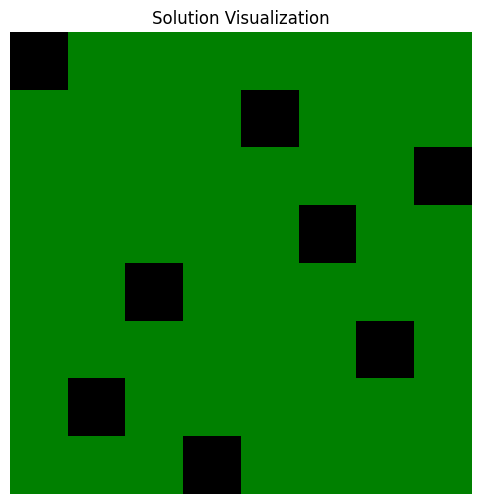

In [8]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt


def visualize_board(chromosome):
    size = len(chromosome)
    board = np.zeros((size, size))
    for col, row in enumerate(chromosome):
        board[row, col] = 1  # Mark queen's position

    cmap = ListedColormap(["Green", "black"])
    plt.figure(figsize=(6, 6))
    plt.imshow(board, cmap=cmap, interpolation="nearest")
    plt.title("Solution Visualization")
    plt.axis("off")
    plt.show()


visualize_board(best_solution)
